# Coronary Heart Disease

This tutorial will discuss how to build classification model and how to evaluate a model.


### What is coronary heart disease?


[Coronary heart disease (CHD)](https://en.wikipedia.org/wiki/Coronary_artery_disease)  is when your coronary arteries (the arteries that supply your heart muscle with oxygen-rich blood) become narrowed by a gradual build-up of fatty material within their walls. These arteries can become narrowed through build-up of plaque, which is made up of cholesterol and other substances. Narrowed arteries can cause symptoms, such as chest pain (angina), shortness of breath, and fatigue.


### Dataset Description

Data is avaialable at: http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/
And header informtion is available at: http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/SAheart.info.txt

A retrospective sample of **males in a heart-disease high-risk region of the Western Cape, South Africa**. There are roughly two controls per case of CHD. Many of the CHD positive men have undergone blood pressure reduction treatment and other programs to reduce their risk factors after their CHD event. In some cases the measurements were made after these treatments. These data are taken from a larger dataset, described in Rousseauw et al, 1983, South African Medical Journal. 

### Import and load the dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [4]:
saheart_ds = pd.read_csv( "SAheart.data" )

In [5]:
saheart_ds.sample(10)

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
402,404,178,5.50,3.79,23.92,Present,45,21.26,6.17,62,1
38,39,130,0.00,2.82,19.63,Present,70,24.86,0.00,29,0
366,368,150,0.00,4.99,27.73,Absent,57,30.92,8.33,24,0
229,230,188,0.00,5.47,32.44,Present,71,28.99,7.41,50,1
425,427,132,0.00,3.30,21.61,Absent,42,24.92,32.61,33,0
200,201,124,0.16,2.44,16.67,Absent,65,24.58,74.91,23,0
6,7,142,4.05,3.38,16.20,Absent,59,20.81,2.62,38,0
439,441,130,4.00,2.40,17.42,Absent,60,22.05,0.00,40,0
254,255,161,9.00,4.65,15.16,Present,58,23.76,43.20,46,0
438,440,130,1.22,3.30,13.65,Absent,50,21.40,3.81,31,0


In [6]:
saheart_ds.columns

Index(['row.names', 'sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea',
       'obesity', 'alcohol', 'age', 'chd'],
      dtype='object')

In [7]:
saheart_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   row.names  462 non-null    int64  
 1   sbp        462 non-null    int64  
 2   tobacco    462 non-null    float64
 3   ldl        462 non-null    float64
 4   adiposity  462 non-null    float64
 5   famhist    462 non-null    object 
 6   typea      462 non-null    int64  
 7   obesity    462 non-null    float64
 8   alcohol    462 non-null    float64
 9   age        462 non-null    int64  
 10  chd        462 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 39.8+ KB


The class label int the column **chd** indicates if the person has a coronary heart disease: negative (0) or positive (1). 

Attributes description: 
- **sbp**:          systolic blood pressure 
- **tobacco**:      cumulative tobacco (kg) 
- **ldl**:          low densiity lipoprotein cholesterol 
- **adiposity**:    the size of the hips compared to the person's height 
- **famhist**:      family history of heart disease (Present, Absent) 
- **typea**:        type-A behavior 
- **obesity**:      BMI index
- **alcohol**:      current alcohol consumption 
- **age**:          age at onset

## Exploratory Data Analysis

### Number of observations available for people with CHD and without CHD

In [8]:
saheart_ds.chd.value_counts()

0    302
1    160
Name: chd, dtype: int64

### What impact alcohol consumption has on CHD?

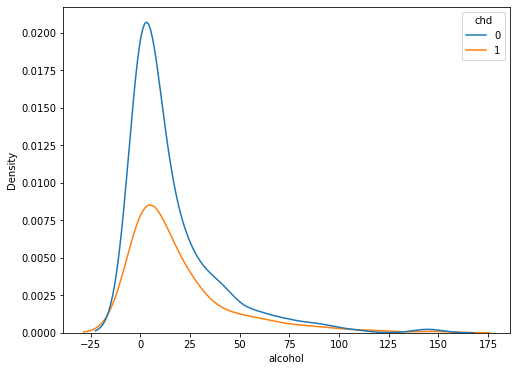

In [9]:
plt.figure(figsize=(8, 6))

sn.kdeplot( data = saheart_ds,
            x = 'alcohol',
            hue = 'chd');

#### Note:

Distribution of alcohol consumption for people with CHD and no CHD seems similar. We can verify this with a hypothesis test.

In [8]:
import scipy.stats as stats

In [9]:
stats.ttest_ind( saheart_ds[ saheart_ds.chd == 0 ].alcohol, 
                 saheart_ds[ saheart_ds.chd == 1 ].alcohol )

Ttest_indResult(statistic=-1.3437633510233433, pvalue=0.1796873576620041)

#### Note:

Average achohol consumption of people with CHD and NO CHD are same. So, achohol consumption may be a non significant factor in determining or predicting CHD.

### What impact tobacco consumption has on CHD?

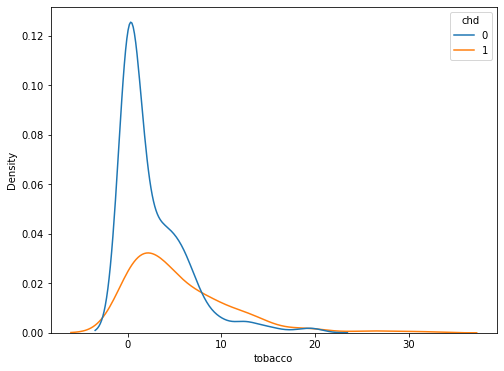

In [10]:
plt.figure(figsize=(8, 6))

sn.kdeplot( data = saheart_ds,
            x = 'tobacco',
            hue = 'chd');

In [11]:
stats.ttest_ind( saheart_ds[ saheart_ds.chd == 0 ].tobacco, 
                 saheart_ds[ saheart_ds.chd == 1 ].tobacco )

Ttest_indResult(statistic=-6.737983717964519, pvalue=4.815842571605575e-11)

### What impact age has on CHD?

<Figure size 576x432 with 0 Axes>

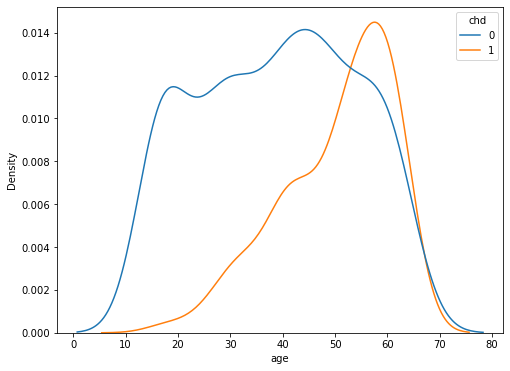

In [12]:
plt.figure(figsize=(8, 6))

plt.figure(figsize=(8, 6))

sn.kdeplot( data = saheart_ds,
            x = 'age',
            hue = 'chd');

In [13]:
stats.ttest_ind( saheart_ds[ saheart_ds.chd == 0 ].age, 
                 saheart_ds[ saheart_ds.chd == 1 ].age )

Ttest_indResult(statistic=-8.621496303728742, pvalue=1.0741818171806074e-16)

### What impact family history has on CHD?

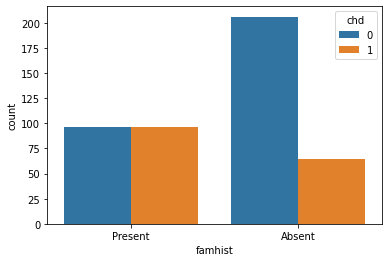

In [14]:
sn.countplot(data = saheart_ds, 
             x = "famhist", 
             hue = "chd" );

#### Note: 

It can be observed that the chances of CHD for people having family history is higher compared to people with no famility history.

In [15]:
crosstable = pd.crosstab(saheart_ds.famhist, saheart_ds.chd)

In [16]:
crosstable_array = np.array(crosstable)

In [17]:
crosstable_array[0]

array([206,  64])

In [18]:
stats.chisquare(crosstable_array[1], 
                [135, 135])

Power_divergenceResult(statistic=22.533333333333335, pvalue=2.0652857961262046e-06)

# Univariate Feature Selection

## Regression

In [20]:
cars_df = pd.read_csv("cars.csv")

In [21]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Location      1038 non-null   object 
 1   Fuel_Type     1038 non-null   object 
 2   Transmission  1038 non-null   object 
 3   Owner_Type    1038 non-null   object 
 4   Seats         1037 non-null   float64
 5   Price         1038 non-null   float64
 6   age           1038 non-null   int64  
 7   KM_Driven     1038 non-null   int64  
 8   make          1038 non-null   object 
 9   mileage       1038 non-null   float64
 10  engine        1038 non-null   int64  
 11  power         1038 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 97.4+ KB


In [22]:
cars_df.sample(10)

,Location,Fuel_Type,Transmission,Owner_Type,Seats,Price,age,KM_Driven,make,mileage,engine,power
1013,Kolkata,Petrol,Manual,First,5.0,1.00,10,37,maruti,17.30,993,60.00
32,Kochi,Petrol,Manual,First,5.0,4.04,2,52,hyundai,19.81,1086,68.05
579,Jaipur,Petrol,Manual,First,5.0,1.50,13,65,maruti,18.90,1061,67.00
668,Chennai,Petrol,Automatic,Second,5.0,4.25,3,12,maruti,23.10,998,67.04
547,Kolkata,Petrol,Manual,First,5.0,1.35,9,40,tata,15.00,1368,90.00
485,Pune,Petrol,Automatic,First,5.0,3.30,4,73,maruti,24.07,998,67.10
968,Mumbai,Petrol,Manual,First,5.0,5.40,2,12,volkswagen,17.00,1198,73.75
146,Mumbai,Petrol,Manual,First,5.0,4.35,6,52,honda,13.00,1493,100.00
925,Jaipur,Petrol,Manual,Second,NaN,1.70,14,88,honda,13.00,1493,100.00
888,Pune,Petrol,Manual,First,5.0,0.90,20,140,honda,13.00,1343,90.00


In [23]:
cars_df = cars_df.dropna()

In [24]:
list(cars_df.columns)

['Location',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Seats',
 'Price',
 'age',
 'KM_Driven',
 'make',
 'mileage',
 'engine',
 'power']

In [25]:
num_features = [ 'Seats',
                 'age',
                 'KM_Driven',
                 'mileage',
                 'engine',
                 'power' ]

In [26]:
from sklearn.feature_selection import f_regression

In [27]:
f_regression(cars_df[num_features], cars_df.Price)

(array([ 41.58911867, 976.75043839,  85.99326498, 124.97565594,
         96.60064511, 381.77839921]),
 array([1.72505001e-010, 1.52352452e-151, 1.02119503e-019, 1.79520127e-027,
        7.40886520e-022, 1.29082129e-072]))

In [28]:
cars_ftest, _ = f_regression(cars_df[num_features], cars_df.Price)
cars_ftest /= np.max(cars_ftest)

In [29]:
cars_ftest_df = pd.DataFrame({'features' : num_features, 'f_testscore': cars_ftest})
cars_ftest_df = cars_ftest_df.sort_values('f_testscore', ascending = False)
cars_ftest_df

,features,f_testscore
1,age,1.000000
5,power,0.390866
3,mileage,0.127950
4,engine,0.098900
2,KM_Driven,0.088040
0,Seats,0.042579


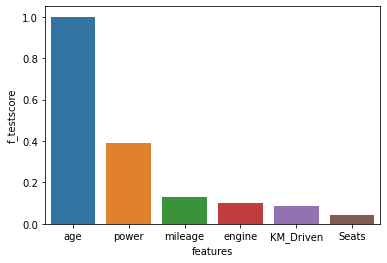

In [30]:
sn.barplot(data = cars_ftest_df,
           x = 'features',
           y = 'f_testscore');

## Classification

In [31]:
num_cols = [ 'sbp',
             'tobacco',
             'ldl',
             'adiposity',
             'typea',
             'obesity',
             'alcohol',
             'age']

In [44]:
from sklearn.feature_selection import f_classif, chi2

In [33]:
f_classif(saheart_ds[num_cols], saheart_ds.chd)

(array([17.673987  , 45.40042458, 34.19679469, 31.75649409,  4.94756521,
         4.65539358,  1.80569994, 74.33019852]),
 array([3.15159932e-05, 4.81584257e-11, 9.45720791e-09, 3.05050773e-08,
        2.66120421e-02, 3.14731680e-02, 1.79687358e-01, 1.07418182e-16]))

In [39]:
saheart_ftest, saheart_ftest_pvalues = f_classif(saheart_ds[num_cols], saheart_ds.chd)
saheart_ftest /= np.max(saheart_ftest)

In [40]:
np.round(saheart_ftest_pvalues, 2)

array([0.  , 0.  , 0.  , 0.  , 0.03, 0.03, 0.18, 0.  ])

In [42]:
saheart_ftest_df = pd.DataFrame({'features' : num_cols, 
                                 'f_testscore': saheart_ftest,
                                 'p_value': np.round(saheart_ftest_pvalues, 2)})
saheart_ftest_df = saheart_ftest_df.sort_values('f_testscore', ascending = False)
saheart_ftest_df

,features,f_testscore,p_value
7,age,1.000000,0.00
1,tobacco,0.610794,0.00
2,ldl,0.460066,0.00
3,adiposity,0.427235,0.00
0,sbp,0.237777,0.00
4,typea,0.066562,0.03
5,obesity,0.062631,0.03
6,alcohol,0.024293,0.18


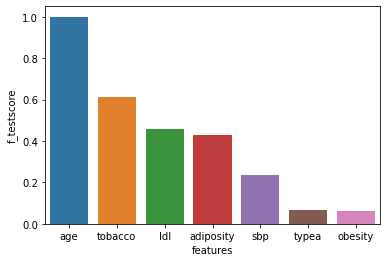

In [43]:
sn.barplot(data = saheart_ftest_df[saheart_ftest_df.p_value < 0.05],
           x = 'features',
           y = 'f_testscore');

In [48]:
saheart_ds['famhist_ohe'] = pd.get_dummies(saheart_ds['famhist'], columns='famhist', drop_first=True)

In [49]:
chi2(saheart_ds[['famhist_ohe']], saheart_ds.chd)

(array([20.03046358]), array([7.62182164e-06]))